In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
from tqdm import tqdm, tqdm_notebook
from scipy.spatial.distance import cdist
from scipy.linalg import norm

%run ../Scripts/coverage.py
%run ../Scripts/initMethods.py

In [14]:
params = { #parameters relevant for the equations
    "Nh":               1,
    "N0":               1,
    "M":                1, #Also L, total number of spacers
    "r":              1000, #cross-reactivity kernel
}
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                    100,
    "dx":                           1,
    "conv_size":                   10,
    "num_threads":                  4,
}

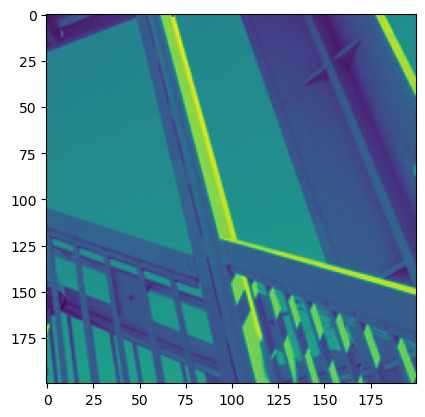

In [15]:
input_ascent = scipy.datasets.ascent()[200:400, 200:400]
params["Nh"] = np.sum(input_ascent)
filter_kernel = init_full_kernel(params, sim_params)
filter_quarter_kernel = init_quarter_kernel(params, sim_params)
plt.imshow(input_ascent)

Text(0.5, 1.0, 'Scipy Single Thread Convolution')

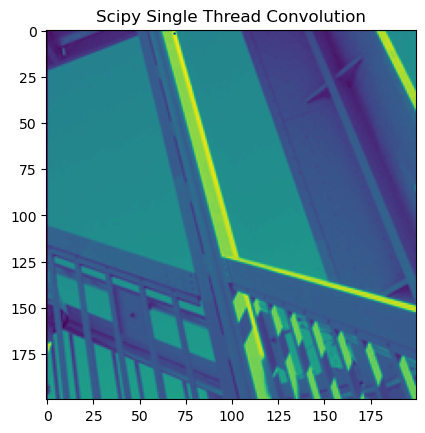

In [16]:
expected_result = scipy.signal.convolve2d(input_ascent/params["Nh"], filter_kernel, mode = "same")
plt.imshow(expected_result)
plt.title("Scipy Single Thread Convolution")

In [17]:
nh = input_ascent
n = expected_result
kernel_quarter = filter_quarter_kernel
conv_size = sim_params["conv_size"]
r = params["r"]

sim_params["conv_size"] = 2000
params["r"] = 1000

In [18]:
kernel_dict = init_dict_kernel(params, sim_params, type = "coverage", exponent = 1)

In [20]:
elementwise_result = elementwise_coverage_vectorized(input_ascent, expected_result, 
        kernel_dict, params, sim_params)
# plt.imshow(elementwise_result.todense())

Fuck this is happening
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/zhi/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_42626/1601991730.py", line 1, in <module>
    elementwise_result = elementwise_coverage_vectorized(input_ascent, expected_result,
  File "/home/zhi/Documents/Code/CRISPR_Sim/Scripts/coverage.py", line 173, in elementwise_coverage_vectorized
    result_values = convolve_subset(A, nonzero_values)
  File "/home/zhi/Documents/Code/CRISPR_Sim/Scripts/coverage.py", line 150, in convolve_subset
    res[i] = np.dot(np.vectorize(lookup_value)(dist).squeeze(), nonzero_values)
  File "<__array_function__ internals>", line 180, in dot
ValueError: shapes (39998,) and (200,200) not aligned: 39998 (dim 0) != 200 (dim 0)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/zhi/anaconda3/lib/python3.9/site-packages/

In [21]:
from copy import deepcopy


nh = deepcopy(input_ascent)
n = deepcopy(expected_result)

In [28]:
def lookup_value(val):
    val = float(val)
    return kernel_dict.get(val, 0.)

def convolve_subset(A, nonzero_values):
    print("Fuck this is happening")
    res = np.zeros(len_ind_n)

    # dist = cdist(A, B)

    for i in range(len_ind_n): #go through indexes of n
        dist = cdist(A, B[i, :].reshape(1,2))
        res[i] = np.dot(np.vectorize(lookup_value)(dist).squeeze(), nonzero_values)
        # res[i] = np.dot(np.vectorize(lookup_value)(dist[:, 0]).squeeze(), nonzero_values)
        # res[i] = np.dot(dist[:, 0], nonzero_values)
        # dist = dist[:, 1:]
    return res

Nh = params["Nh"]
M = params["M"]

x_ind_nh, y_ind_nh = nh.nonzero()
x_ind_n, y_ind_n = n.nonzero()

A = np.array([x_ind_nh, y_ind_nh]).transpose()
B = np.array([x_ind_n, y_ind_n]).transpose()
len_ind_n = len(x_ind_n)

input_h = np.divide(nh, Nh*M)
if scipy.sparse.issparse(input_h):
    input_h = input_h[x_ind_nh, y_ind_nh].toarray()
    nonzero_values = np.array(input_h).squeeze()
else:
    input_h = input_h[x_ind_nh, y_ind_nh]
    nonzero_values = np.array(input_h).squeeze()

result_values = convolve_subset(A, nonzero_values)
res = scipy.sparse.dok_matrix(n.shape, dtype=float)
res[x_ind_n, y_ind_n] = result_values

Fuck this is happening


In [27]:
result_values

In [93]:
result_values = np.concatenate(results)
res = scipy.sparse.dok_matrix(n.shape, dtype=float)
res[x_ind_n, y_ind_n] = result_values

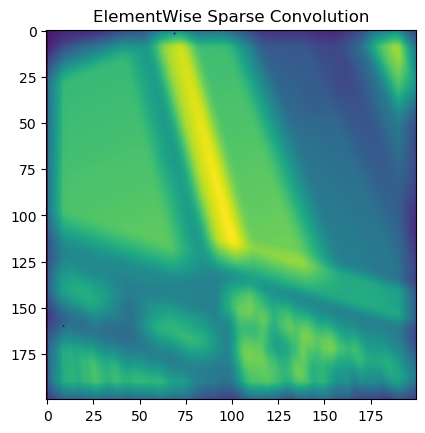

In [29]:
plt.imshow((res).toarray())
plt.title("ElementWise Sparse Convolution")
plt.show()

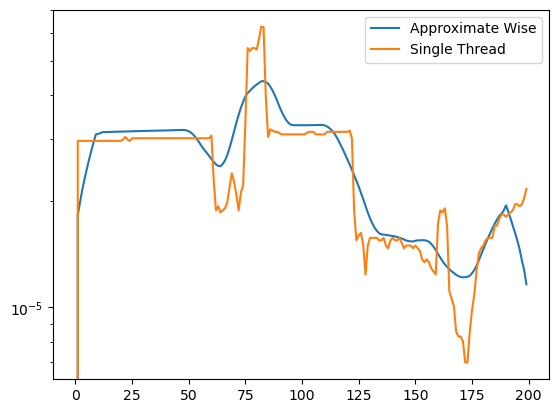

In [30]:
plt.plot(res.toarray()[50,:]/np.sum(res), label = "Approximate Wise")
plt.plot(expected_result[50,:], label = "Single Thread")
# plt.plot(n[50,:], label = "Single Thread")
plt.legend()
plt.yscale("log")

In [31]:
plt.plot(elementwise_result.toarray()[100,:], label = "Element Wise")
plt.plot(res.toarray()[100,:], label = "Vectorized")
plt.legend()

NameError: name 'elementwise_result' is not defined

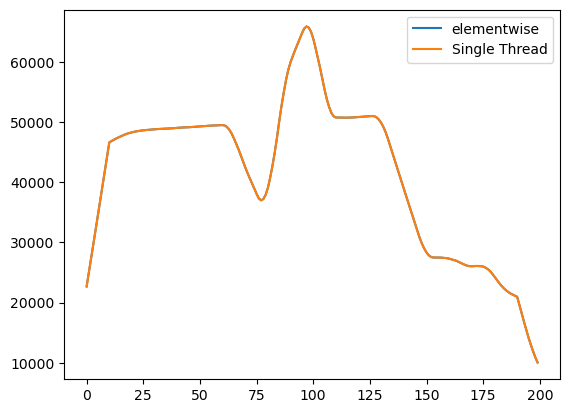

In [35]:
plt.plot(split_result.toarray()[100,:], label = "elementwise")
plt.plot(expected_result[100,:], label = "Single Thread")
plt.legend()